## Trong lúc support anh đã giúp em giải quyết khá nhiều bước rồi, đặc biệt là phần tính toán, nên ở đây anh không có nhận xét gì thêm nhé. Phần insight anh thấy em có nhiều góc nhìn khá hay, có thể do em đã có trải nghiệm hoặc hiểu biết nhất định về mảng này (anh đoán thế :)) ). Em cứ tiếp tục trau dồi phần technical nhé, tập google nhiều vào, đây cũng là một skill rất quan trọng không chỉ khi code; cứ tập trung vào input và expected output là sớm muộn cũng ra hướng giải quyết :D

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
my_file = drive.CreateFile({'id':'1qIXJG5slC-oex5xrV9FvOidtP9Ajv2U5'})


In [ ]:
my_file.GetContentFile('Dataset.xlsx')

In [ ]:
# Sử dụng hàm ExcelFile của pandas để đọc file xlsx
data = pd.ExcelFile('Dataset.xlsx')

# Lấy danh sách các tên sheet trong file
sheet_names = data.sheet_names

# Hiển thị các tên sheet
for sheet_name in sheet_names:
    print(sheet_name)

Orders
Product
Location
Customer
Return
Segmentation


In [ ]:
orders = pd.read_excel('Dataset.xlsx', sheet_name = "Orders")
product = pd.read_excel('Dataset.xlsx', sheet_name = "Product")
location = pd.read_excel('Dataset.xlsx', sheet_name = "Location")
customer = pd.read_excel('Dataset.xlsx', sheet_name = "Customer")
returned = pd.read_excel('Dataset.xlsx', sheet_name = "Return")
seg = pd.read_excel('Dataset.xlsx', sheet_name = "Segmentation")
orders.head()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


In [ ]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Row ID       632 non-null    int64 
 1   Postal Code  632 non-null    int64 
 2   Country      632 non-null    object
 3   City         632 non-null    object
 4   State        632 non-null    object
 5   Region       632 non-null    object
dtypes: int64(2), object(4)
memory usage: 29.8+ KB


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         793 non-null    int64 
 1   Customer ID    793 non-null    object
 2   Customer Name  793 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.7+ KB


In [ ]:
returned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [ ]:
orders['Order ID'].value_counts()

CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2016-105732    10
                  ..
CA-2016-140249     1
US-2016-146794     1
CA-2016-157714     1
CA-2016-165820     1
CA-2014-103800     1
Name: Order ID, Length: 5009, dtype: int64

In [ ]:
orders_incl_rt = orders.merge(returned, on = 'Order ID', how = 'left')
orders_incl_rt
orders_excl_rt = orders_incl_rt[orders_incl_rt['Returned'] != 'Yes']
orders_excl_rt

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [ ]:
pur_time = orders_excl_rt.pivot_table('Order ID', index = 'Customer ID', aggfunc=lambda x: len(x.unique()))

In [ ]:
pur_time['Frequency']= pd.qcut(pur_time['Order ID'],
                             q = 5, labels = [1,2,3,4,5])
pur_time

,Order ID,Frequency
Customer ID,,
AA-10315,5,2
AA-10375,9,5
AA-10480,4,1
AA-10645,5,2
AB-10015,3,1
...,...,...
XP-21865,9,5
YC-21895,4,1
YS-21880,8,4


In [ ]:
import datetime

In [ ]:
recent_order = orders_excl_rt.pivot_table('Order Date', index = 'Customer ID', aggfunc = 'max')
recent_order['Today'] = "31/12/2017"
recent_order['Today'] = pd.to_datetime(recent_order['Today'])
recent_order['Duration'] = (recent_order['Today'] - recent_order['Order Date']).dt.days

recent_order

<ipython-input-129-9dd7e47b4ea8>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  recent_order['Today'] = pd.to_datetime(recent_order['Today'])


,Order Date,Today,Duration
Customer ID,,,
AA-10315,2017-06-29,2017-12-31,185
AA-10375,2017-12-11,2017-12-31,20
AA-10480,2017-04-15,2017-12-31,260
AA-10645,2016-09-04,2017-12-31,483
AB-10015,2016-11-10,2017-12-31,416
...,...,...,...
XP-21865,2017-10-09,2017-12-31,83
YC-21895,2017-12-26,2017-12-31,5
YS-21880,2017-12-21,2017-12-31,10


In [ ]:
test = recent_order.rename(columns={'Order Date': 'Order 1'})
test

,Order 1,Today,Duration,Recency
Customer ID,,,,
MW-18235,2014-05-21,2017-12-31,1320,1
CR-12625,2014-08-23,2017-12-31,1226,1
NB-18580,2014-10-22,2017-12-31,1166,1
GR-14560,2014-11-21,2017-12-31,1136,1
RE-19405,2014-12-29,2017-12-31,1098,1
...,...,...,...,...
JG-15160,2017-12-29,2017-12-31,2,5
KH-16360,2017-12-29,2017-12-31,2,5
PO-18865,2017-12-30,2017-12-31,1,5


In [ ]:
recent_order['Recency']= pd.qcut(recent_order['Duration'],
                             q = 5, labels = [5,4,3,2,1])
recent_order

,Order Date,Today,Duration,Recency
Customer ID,,,,
AA-10315,2017-06-29,2017-12-31,185,2
AA-10375,2017-12-11,2017-12-31,20,5
AA-10480,2017-04-15,2017-12-31,260,2
AA-10645,2016-09-04,2017-12-31,483,1
AB-10015,2016-11-10,2017-12-31,416,1
...,...,...,...,...
XP-21865,2017-10-09,2017-12-31,83,3
YC-21895,2017-12-26,2017-12-31,5,5
YS-21880,2017-12-21,2017-12-31,10,5


In [ ]:
total_spent = orders_excl_rt.pivot_table('Sales', index = 'Customer ID', aggfunc = 'sum')
total_spent

,Sales
Customer ID,
AA-10315,5563.560
AA-10375,1056.390
AA-10480,1790.512
AA-10645,5073.975
AB-10015,886.156
...,...
XP-21865,2110.726
YC-21895,5438.650
YS-21880,6720.444


In [ ]:
total_spent['Monetary']= pd.qcut(total_spent['Sales'],
                             q = 5, labels = [1,2,3,4,5])
total_spent

,Sales,Monetary
Customer ID,,
AA-10315,5563.560,5
AA-10375,1056.390,2
AA-10480,1790.512,3
AA-10645,5073.975,5
AB-10015,886.156,2
...,...,...
XP-21865,2110.726,3
YC-21895,5438.650,5
YS-21880,6720.444,5


In [ ]:
full_rank = pur_time.merge(recent_order, on = 'Customer ID'). \
                         merge(total_spent, on = 'Customer ID')
full_rank

,Order ID,Frequency,Order Date,Today,Duration,Recency,Sales,Monetary
Customer ID,,,,,,,,
AA-10315,5,2,2017-06-29,2017-12-31,185,2,5563.560,5
AA-10375,9,5,2017-12-11,2017-12-31,20,5,1056.390,2
AA-10480,4,1,2017-04-15,2017-12-31,260,2,1790.512,3
AA-10645,5,2,2016-09-04,2017-12-31,483,1,5073.975,5
AB-10015,3,1,2016-11-10,2017-12-31,416,1,886.156,2
...,...,...,...,...,...,...,...,...
XP-21865,9,5,2017-10-09,2017-12-31,83,3,2110.726,3
YC-21895,4,1,2017-12-26,2017-12-31,5,5,5438.650,5
YS-21880,8,4,2017-12-21,2017-12-31,10,5,6720.444,5


In [ ]:
full_rank['Monetary'] = pd.factorize(full_rank['Monetary'], sort=True)[0] + 1 
full_rank['Frequency'] = pd.factorize(full_rank['Frequency'], sort=True)[0] + 1
full_rank['Recency'] = pd.factorize(full_rank['Recency'], sort=True)[0] + 1
full_rank['Recency'] = full_rank['Recency'].replace(to_replace=[1,2,3,4,5],value=[5,4,3,2,1])
full_rank.head()

,Order ID,Frequency,Order Date,Today,Duration,Recency,Sales,Monetary
Customer ID,,,,,,,,
AA-10315,5,2,2017-06-29,2017-12-31,185,2,5563.560,5
AA-10375,9,5,2017-12-11,2017-12-31,20,5,1056.390,2
AA-10480,4,1,2017-04-15,2017-12-31,260,2,1790.512,3
AA-10645,5,2,2016-09-04,2017-12-31,483,1,5073.975,5
AB-10015,3,1,2016-11-10,2017-12-31,416,1,886.156,2


In [ ]:
#check = full_rank['QuantileRank'].dtypes
#check
full_rank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, AA-10315 to ZD-21925
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    791 non-null    int64         
 1   Frequency   791 non-null    int64         
 2   Order Date  791 non-null    datetime64[ns]
 3   Today       791 non-null    datetime64[ns]
 4   Duration    791 non-null    int64         
 5   Recency     791 non-null    int64         
 6   Sales       791 non-null    float64       
 7   Monetary    791 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 55.6+ KB


In [ ]:
full_rank['Recency'] = full_rank['Recency'].apply(str)
full_rank['Frequency'] = full_rank['Frequency'].apply(str)
full_rank['Monetary'] = full_rank['Monetary'].apply(str)

In [ ]:
full_rank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, AA-10315 to ZD-21925
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    791 non-null    int64         
 1   Frequency   791 non-null    object        
 2   Order Date  791 non-null    datetime64[ns]
 3   Today       791 non-null    datetime64[ns]
 4   Duration    791 non-null    int64         
 5   Recency     791 non-null    object        
 6   Sales       791 non-null    float64       
 7   Monetary    791 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 55.6+ KB


In [ ]:
full_rank['Final_score'] = full_rank['Recency'] + full_rank['Frequency'] + full_rank['Monetary'] 
full_rank.head()

,Order ID,Frequency,Order Date,Today,Duration,Recency,Sales,Monetary,Final_score
Customer ID,,,,,,,,,
AA-10315,5,2,2017-06-29,2017-12-31,185,2,5563.560,5,225
AA-10375,9,5,2017-12-11,2017-12-31,20,5,1056.390,2,552
AA-10480,4,1,2017-04-15,2017-12-31,260,2,1790.512,3,213
AA-10645,5,2,2016-09-04,2017-12-31,483,1,5073.975,5,125
AB-10015,3,1,2016-11-10,2017-12-31,416,1,886.156,2,112


In [ ]:
full_rank['Recency'] = full_rank['Recency'].astype(int)
full_rank['Frequency'] = full_rank['Frequency'].astype(int)
full_rank['Monetary'] = full_rank['Monetary'].astype(int)

In [ ]:
full_rank['F_focus'] = np.where((full_rank['Frequency'] < 3) & (full_rank['Recency'] > 2) & (full_rank['Monetary'] > 2),'Yes','No')
full_rank[full_rank['F_focus'] == 'Yes']

,Order ID,Frequency,Order Date,Today,Duration,Recency,Sales,Monetary,Final_score,F_focus
Customer ID,,,,,,,,,,
AC-10615,5,2,2017-12-24,2017-12-31,7,5,2537.6860,4,524,Yes
AH-10195,4,1,2017-11-05,2017-12-31,56,4,1587.4520,3,413,Yes
AR-10540,5,2,2017-12-24,2017-12-31,7,5,5915.7200,5,525,Yes
AS-10225,4,1,2017-09-17,2017-12-31,105,3,4191.3040,5,315,Yes
AS-10285,5,2,2017-12-11,2017-12-31,20,5,3113.7400,4,524,Yes
...,...,...,...,...,...,...,...,...,...,...
TB-21175,4,1,2017-11-02,2017-12-31,59,3,3589.2960,4,314,Yes
TH-21115,4,1,2017-11-02,2017-12-31,59,3,2942.7720,4,314,Yes
TP-21415,5,2,2017-09-17,2017-12-31,105,3,5329.0048,5,325,Yes


In [ ]:
full_rank['M_focus'] = np.where((full_rank['Monetary'] < 3) & (full_rank['Recency'] > 2) & (full_rank['Frequency'] > 2),'Yes','No')
full_rank[full_rank['M_focus'] == 'Yes']

,Order ID,Frequency,Order Date,Today,Duration,Recency,Sales,Monetary,Final_score,F_focus,M_focus
Customer ID,,,,,,,,,,,
AA-10375,9,5,2017-12-11,2017-12-31,20,5,1056.3900,2,552,No,Yes
AB-10165,8,4,2017-12-05,2017-12-31,26,5,1113.8380,2,542,No,Yes
AH-10120,6,3,2017-10-31,2017-12-31,61,3,1125.0960,2,332,No,Yes
AS-10630,7,3,2017-09-29,2017-12-31,93,3,833.3980,1,331,No,Yes
AT-10435,6,3,2017-12-09,2017-12-31,22,5,1171.8140,2,532,No,Yes
BD-11620,6,3,2017-10-22,2017-12-31,70,3,1538.1100,2,332,No,Yes
BF-10975,7,3,2017-09-30,2017-12-31,92,3,599.7980,1,331,No,Yes
BG-11740,6,3,2017-11-03,2017-12-31,58,4,1006.3560,2,432,No,Yes
BM-11575,6,3,2017-09-21,2017-12-31,101,3,808.1620,1,331,No,Yes


In [ ]:
full_rank['R_focus'] = np.where((full_rank['Recency'] < 3) & (full_rank['Monetary'] > 2) & (full_rank['Frequency'] > 2),'Yes','No')
full_rank = full_rank.rename(columns={'Order ID': 'Order times'})
full_rank = full_rank.rename(columns={'Order Date': 'Last order'})
full_rank[full_rank['R_focus'] == 'Yes']

,Order times,Frequency,Last order,Today,Duration,Recency,Sales,Monetary,Final_score,F_focus,M_focus,R_focus
Customer ID,,,,,,,,,,,,
AH-10690,10,5,2016-11-15,2017-12-31,411,1,7007.946,5,155,No,No,Yes
AM-10705,8,4,2017-07-21,2017-12-31,163,2,5664.022,5,245,No,No,Yes
AZ-10750,6,3,2017-07-23,2017-12-31,161,2,1622.018,3,233,No,No,Yes
BC-11125,9,5,2017-06-11,2017-12-31,203,2,2933.676,4,254,No,No,Yes
BE-11455,6,3,2017-04-20,2017-12-31,255,2,1727.652,3,233,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
SW-20455,7,3,2017-07-21,2017-12-31,163,2,2921.544,4,234,No,No,Yes
TB-21250,7,3,2017-01-15,2017-12-31,350,1,1602.376,3,133,No,No,Yes
TB-21280,6,3,2016-05-26,2017-12-31,584,1,2198.450,3,133,No,No,Yes


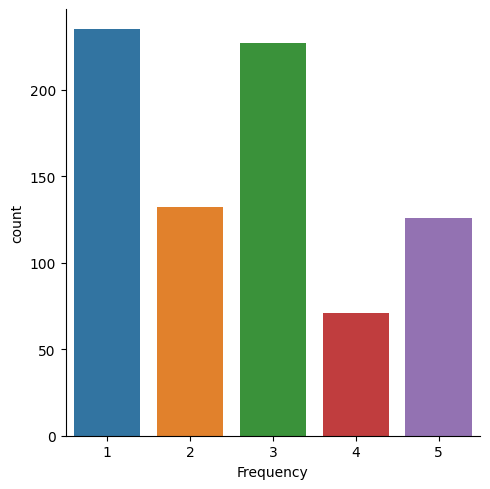

In [ ]:
sns.catplot(x = 'Frequency', data = full_rank, kind = 'count')

Nhìn chung, chưa xây dựng được một lượng khách hàng thân thiết lâu dài và sẽ gần như giảm dần theo thời gian, cần đẩy mạnh chương trình khách hàng thân thiết

*Điểm khác như Monetary và Recency có độ phân bổ gần như ngang nhau*

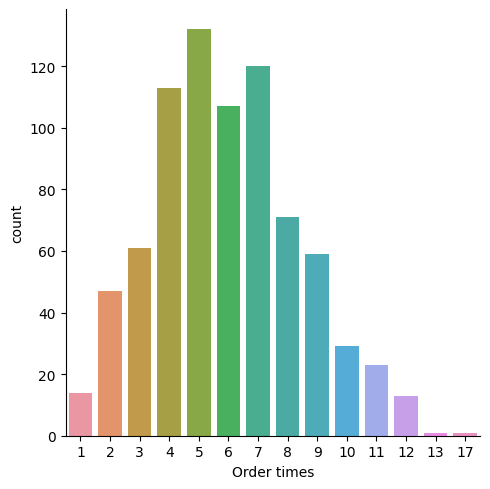

In [ ]:
sns.catplot(x = "Order times", data = full_rank, kind = 'count')

Nhìn chung, công ty có một lượng khách hàng quay lại nhất định và mua hàng nhiều lần.
Vòng đời của khách hàng: Mua 17 lần
Vòng đời trung bình: Mua 5 lần

Theo đó, khách hàng sẽ chủ yếu mua tới lần thứ 7 và sẽ bớt dần đi. Nên có những chương trình khuyến mãi cho những khách hàng ưu đãi đặc quyền đã mua hàng tới lần thứ 7.

In [ ]:
# 5 ở đây là giá trị mode (xuất hiện nhiều lần nhất) chứ có phải mean đâu nhỉ :)) hay anh nhầm =))

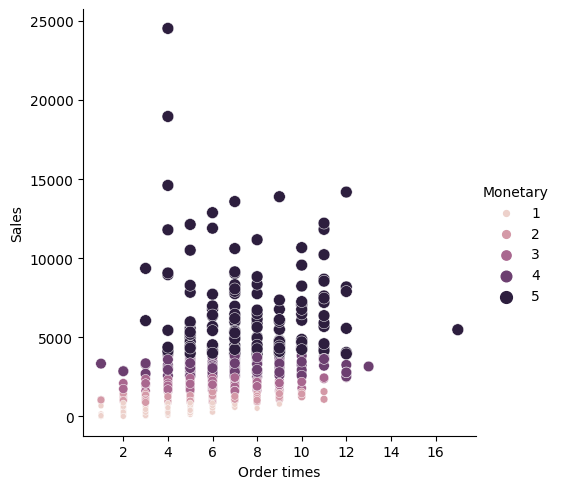

In [ ]:
sns.relplot(y='Sales', x='Order times',data = full_rank,kind='scatter',hue='Monetary', size = 'Monetary')

Đi sâu vào doanh thu của mỗi lần mua hàng, ta có thể thấy từ lần mua thứ 3 trở đi, doanh thu của khách hàng bỏ ra đã rất tốt, đặc biệt mức chi tiêu của khách hàng đã có người tới 25k ở lần mua thứ 4 và sau đó phần lớn mỗi KH **đều có tổng chi tiêu từ 4k - 7k tăng dần theo thời gian**. 

**Tuy nhiên, vẫn có rất nhiều trường hợp khách hàng "quen thuộc", mua nhiều lần, thậm chí đến lần thứ 11 mà mức chi tiêu lũy kế họ bỏ ra vẫn chỉ ở mức dưới 2.5k.**

Vì vậy, nên chú trọng đánh mạnh vào tệp khách hàng đang có mức chi tiêu từ 2.5k - 4k để upsale và cross sale, có thể lấy 2.5k để làm mốc thành viên để bắt đầu nhận các quyền lợi và khuyến mãi hấp dẫn. Tập trung các chiến lược tối đa Doanh thu trên mỗi bill/mỗi khách vào lần mua hàng từ 4- 7 lần (4 là lần bắt đầu ghi nhận hành vi mua hàng tăng lên đáng kể, 7 là số lần KH bắt đầu rời đi theo biểu đồ ở trên).

Để xem danh sách những khách hàng có tiềm năng để tăng Chi tiêu, xem bảng ở trên với điều kiện M_focus = "Yes"

Các hành động đề xuất:
- Chạy chương trình Thành viên VIP khi đạt được Mức chi tiêu kỳ vọng với các đặc quyền:
  + Các đặc quyền: dùng thử sản phẩm, ưu tiên được chọn trong waitlist để trải nghiệm sản phẩm mới ra mắt cùng các chương trình ưu đãi hấp dẫn.
  + Các lợi ích vượt trội so với các membership khác: chuyến đi du lịch, trúng xe, tăng gấp đôi thời gian bảo hành, 1 đổi 1 miễn phí kể cả lỗi chủ quan của khách hàng trong 3 tháng đầu,...
- Cross sale, Upsale với các Combo đặc biệt.
- Phương thức thanh toán dễ dàng: trả góp, trả trước 1 phần nhỏ.

*Danh sách khách hàng tham khảo bảng full_rank với điều kiện M_focus = "Yes"* 

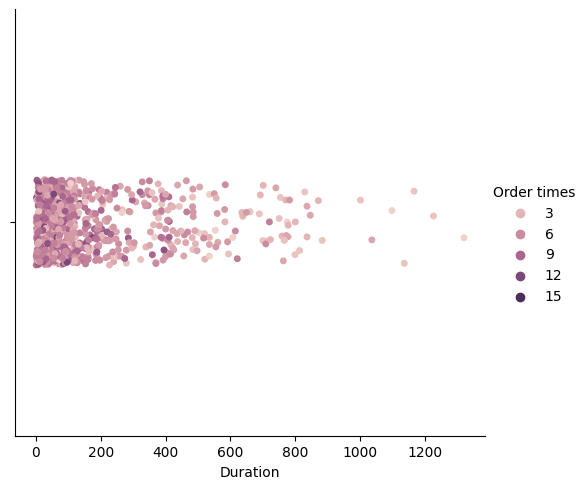

In [ ]:
sns.catplot(x = 'Duration', data = full_rank, hue = 'Order times')
#plt.xticks(rotation=45)

Có thể giả định 2 nhóm khách hàng tương ứng: 1 là trong vòng 200 ngày kể từ ngày mua gần nhất, 1 là hơn 200 ngày (để phục vụ cho bảng ở dưới).

(array([16801., 16861., 16922., 16983., 17045., 17106., 17167., 17226.,
        17287., 17348., 17410.]),
 [Text(16801.0, 0, '2016-01'),
  Text(16861.0, 0, '2016-03'),
  Text(16922.0, 0, '2016-05'),
  Text(16983.0, 0, '2016-07'),
  Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09')])

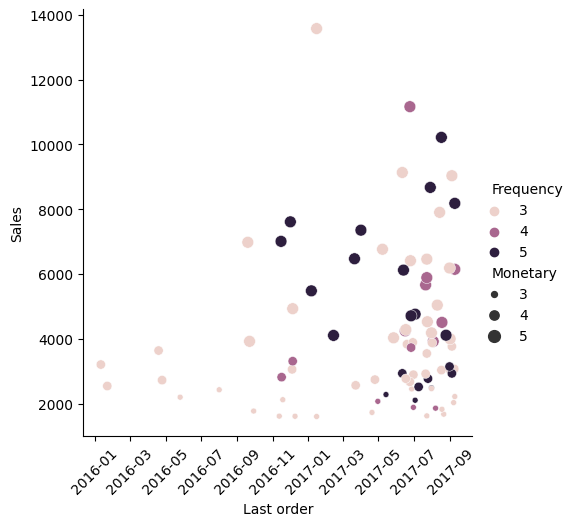

In [ ]:
sns.relplot(x = 'Last order', y = 'Sales', kind = 'scatter', data = full_rank[full_rank['R_focus'] == 'Yes'], size = 'Monetary', hue = 'Frequency')
plt.xticks(rotation = 45)

Mốc tháng 6/2017 (cách 6 tháng) trở về trước, khả năng cao là khách hàng đã chọn mua sắm ở đối thủ hoặc quên, lưỡng lự, cho một chu kỳ mua hàng tiếp theo.

**Cụ thể, trong khoảng thời gian từ tháng 10/2016 - 6/2017 ghi nhận: những khách hàng "thân quen": có sức mua tốt *(tổng lũy kế lên tới 8000)*, tần suất mua sắm cao *(đánh giá 4/5 hoặc 5/5 điểm)*, vậy mà vẫn chưa thấy thêm một giao dịch nào phát sinh**. 

Theo phân tích ở trên, khách hàng mua sắm nhiều lần (> 7 lần) thường chiếm không nhiều và thường sẽ thoái trào dần về sau. Đó cũng có thể là lí do ở bảng trên có nhiều chấm đen (F: 5/5 điểm)

Đối với tệp đã mua nhiều lần, cần nhắc nhở khách hàng tiếp tục quay lại mua hàng bằng cách chương trinh sau để tránh mất khách:

- Remind Purchase bằng quà tặng hoặc ưu đãi cực kỳ hấp dẫn, mới lạ so với các đối thủ khác thị trường (give away các sản phẩm tồn kho cao, voucher áp dụng ngay lập tức,...)
- Với tệp khách hàng đủ lớn, nghiên cứu và ra mắt các sản phẩm tailor made phù hợp với thị hiếu và nhu cầu mua sắm, tiêu dùng của họ.

**Ngoài ra, trong khoảng thời gian 1/2016 đến 9/2016 cũng ghi nhận một lượng khách hàng tiềm năng với điểm đánh giá tần suất mua hàng F = 3**. Khác với những khách hàng vãng lai (F=1; 2) có thể lãng phí tài nguyên marketing, những cases này có thể vẫn convert được bằng một số cách sau:

- Giới thiệu, ra mắt các chương trình thành viên và tạo những rule, trò chơi dễ chơi, dễ thăng hạng.
- Tính toán phần thưởng và các quà tặng, khuyến mãi nhỏ (VD:freeship,...) mà easily claim (nhóm KH này đang có sức chi khá nhát tay).
- Với ngân sách thích hợp, nghiên cứu, phát triển thêm cấc sản phẩm bình dân, phù hợp với nhiều đối tượng, dễ mua.

*Tham khảo danh sách bảng full_rank với điều kiện F_focus = "Yes" hoặc R_focus = "Yes"*
